In [2]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
# Import 88Rising Data
df_88 = pd.read_csv('../Test-Data/pre-final-88-genre.csv')
df_88.columns

Index(['Unnamed: 0', 'track', 'album', 'artist', 'popularity', 'featured',
       'release_date', 'track_id', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'instrumentalness', 'liveness', 'valence',
       'tempo', 'duration_ms', 'time_signature', 'lyrics', 'filtered_lyrics',
       'genre'],
      dtype='object')

In [47]:
df_88['genre']

0      ['R&B', 'K-R&B', 'Reggaetón', 'South Korea', '...
1               ['R&B', 'South Korea', 'Trap', 'Korean']
2      ['R&B', 'Korean', 'K-R&B', 'K-Solo', 'South Ko...
3      ['R&B', 'K-R&B', 'Korean', 'K-Solo', 'South Ko...
4                                                     []
                             ...                        
453                                 ['Rap', 'Indonesia']
454                                                   []
455                                              ['Rap']
456                                 ['Pop', 'Indonesia']
457                                   ['Rap', 'Hip-Hop']
Name: genre, Length: 458, dtype: object

In [23]:
import re

In [30]:
type(df_88['genre'][0])

str

In [39]:
df_88['genre'][0]

"['R&B', 'K-R&B', 'Reggaetón', 'South Korea', 'Genius Korea', 'Korean', 'K-Solo']"

In [73]:
df_88['genre'] = df_88['genre'].apply(lambda x: re.sub("['[\]]", "", x))
df_88['genre']=df_88['genre'].apply(lambda x: re.split(r',', x))

In [57]:
df_88['genre'][0][0]

'R&B'

In [74]:
df_88['primary_genre'] = df_88['genre'].apply(lambda x: x[0])
df_88['primary_genre'].unique()

array(['R&B', '', 'Pop', 'Rock', 'Rap'], dtype=object)

In [76]:
df_88.drop(['Unnamed: 0', 'track', 'album', 'genre', 'featured', 'release_date','time_signature', 'track_id', 'lyrics', 'filtered_lyrics'], axis=1, inplace = True)
df_88.columns

Index(['artist', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'instrumentalness', 'liveness', 'valence',
       'tempo', 'duration_ms', 'primary_genre'],
      dtype='object')

In [85]:
# Label x and y for model
y = df_88['primary_genre']
X = df_88.loc[:, df_88.columns != 'primary_genre']

In [86]:
# Convert Categorical into Numerical categories
X_num = pd.get_dummies(X)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y, random_state=1)

In [102]:
clf = RandomForestClassifier(random_state=1, n_estimators=10).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9883381924198251
Testing Score: 0.5565217391304348


In [89]:
# Scaling values
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.5739130434782609


In [92]:
X_train.columns

Index(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'artist_BIBI', 'artist_CHUNG HA', 'artist_Dumbfoundead',
       'artist_Guapdad 4000', 'artist_Higher Brothers', 'artist_Jackson Wang',
       'artist_Joji', 'artist_Keith Ape', 'artist_Lexie Liu', 'artist_Mili',
       'artist_Rich Brian', 'artist_Seori', 'artist_Stephanie Poetri',
       'artist_Warren Hue'],
      dtype='object')

[0.0853933  0.10023003 0.06894441 0.04722567 0.07795053 0.01535586
 0.1164457  0.04266365 0.07200115 0.07549237 0.0639999  0.07334834
 0.02497976 0.03382868 0.01018691 0.0063851  0.00436208 0.01109503
 0.00684717 0.00787848 0.00642081 0.01016911 0.0145071  0.00667979
 0.00962673 0.00798233]


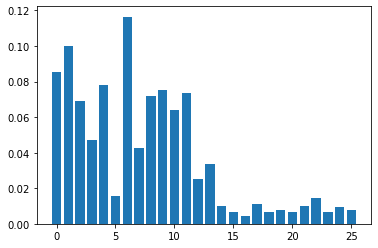

In [91]:
# Feature Selection
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [93]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [95]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_num), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

c:\Users\krist\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [126]:
clf = RandomForestClassifier(random_state=1, n_estimators=10).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9941690962099126
Testing Score: 0.4260869565217391


In [103]:
# Test K-means Algorithm
from sklearn.cluster import KMeans


In [106]:
num_clust = len(df_88['primary_genre'].unique())

In [107]:
model = KMeans(n_clusters=num_clust, random_state=5)

In [117]:
df_88_no_genre = df_88.drop('primary_genre', axis=1)
# Convert data into numerical
df_88_num = pd.get_dummies(df_88_no_genre)

In [118]:
model.fit(df_88_num)

KMeans(n_clusters=5, random_state=5)

In [119]:
predictions = model.predict(df_88_num)
print(predictions)

[3 3 2 3 2 4 0 2 2 3 2 3 3 2 0 2 0 3 0 2 3 0 3 2 2 3 2 3 3 2 2 3 3 3 3 3 3
 2 2 2 2 2 3 2 3 4 2 2 3 2 2 3 2 2 2 3 2 2 2 2 2 0 2 2 2 2 3 2 2 2 2 2 2 0
 2 2 3 2 4 2 4 2 2 0 2 2 2 2 0 2 3 4 0 3 2 2 2 2 4 3 3 3 3 4 2 2 3 2 3 3 2
 3 2 4 2 3 2 2 2 2 0 0 2 3 4 2 3 3 4 2 1 2 3 3 0 2 2 0 2 3 3 3 3 3 2 3 0 2
 3 3 2 0 2 3 3 3 2 4 3 0 2 3 3 2 3 3 4 2 2 4 3 3 3 3 4 2 2 3 4 3 3 4 2 2 3
 3 2 3 0 2 0 0 2 3 0 0 0 3 2 3 3 2 2 3 0 4 0 3 3 2 0 0 2 2 2 3 0 0 3 4 0 2
 3 0 0 2 3 3 0 2 3 0 2 2 3 4 2 0 2 4 3 4 3 2 4 4 3 2 0 3 3 2 0 0 1 3 0 2 2
 3 2 2 2 2 0 2 0 2 0 0 2 0 0 2 2 2 2 2 3 2 2 3 2 2 4 3 4 3 4 3 2 3 3 2 4 2
 2 2 0 0 2 0 2 2 2 2 2 3 3 2 2 3 2 2 0 2 2 3 2 2 4 3 4 4 2 3 2 2 4 0 3 2 3
 2 4 0 0 4 4 3 3 2 2 4 4 2 2 0 2 2 3 2 2 2 3 3 2 2 0 0 2 4 4 2 4 3 0 4 3 4
 3 2 3 3 2 2 3 4 3 3 2 0 3 3 2 0 3 3 4 2 2 2 2 2 2 2 0 3 2 2 2 2 2 2 3 0 2
 0 2 2 3 3 0 2 2 3 3 2 3 3 2 0 0 2 3 3 3 2 2 3 0 2 0 2 0 2 3 2 2 3 0 4 4 3
 3 3 2 3 3 0 0 0 2 0 3 0 3 2]


In [120]:
df_88_num["class"] = model.labels_
df_88_num.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,...,artist_Jackson Wang,artist_Joji,artist_Keith Ape,artist_Lexie Liu,artist_Mili,artist_Rich Brian,artist_Seori,artist_Stephanie Poetri,artist_Warren Hue,class
0,76,0.442,0.748,11,-4.718,0,0.0895,0.000128,0.0642,0.408,...,0,0,0,0,0,0,0,0,0,3
1,68,0.625,0.686,6,-3.715,0,0.0414,0.000000,0.1100,0.263,...,0,0,0,0,0,0,0,0,0,3
2,67,0.617,0.570,5,-4.280,0,0.0308,0.000006,0.5500,0.375,...,0,0,0,0,0,0,0,0,0,2
3,66,0.746,0.558,0,-7.470,0,0.0880,0.000190,0.0904,0.638,...,0,0,0,0,0,0,0,0,0,3
4,62,0.528,0.423,8,-7.381,1,0.0264,0.001480,0.1670,0.249,...,0,0,0,0,0,0,0,0,0,2


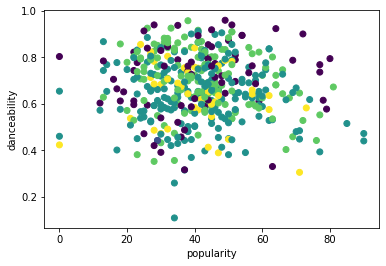

In [121]:
plt.scatter(x=df_88_num['popularity'], y=df_88_num['danceability'], c=df_88_num['class'])
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

c:\Users\krist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


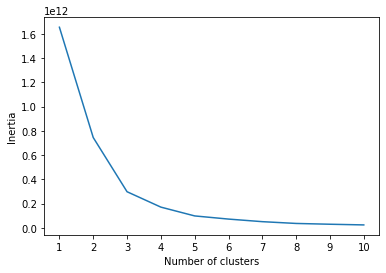

In [123]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_88_num)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()